In [1]:
# Outside imports
import os
import importlib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [2]:
os.chdir('../')

In [3]:
import data_util.config
importlib.reload(data_util.config)
from data_util.config import *

In [4]:
!pwd

/Users/rowancassius/Desktop/capstone/LSTM_Summarizer


In [5]:
log_root

'/Users/rowancassius/Desktop/capstone/LSTM_Summarizer'

In [6]:
result_path = os.path.join(log_root, results_path)

In [7]:
df = pd.read_csv(os.path.join(result_path, 'test_results_with_art.csv'), sep = '\t')

In [8]:
pd.set_option('display.max_colwidth', -1)

### Word Counts

In [9]:
count_tokens = lambda x: len(x.split())
df['SumWC'] = df['ref'].map(count_tokens)
df['TaskWC'] = df['TaskSentence'].map(count_tokens)
df['Context'] = df['Context'].astype(str)
df['ContextWC'] = df['Context'].map(count_tokens)
df['DecWC'] = df['decoded'].map(count_tokens)

In [10]:
df.shape

(564, 8)

In [11]:
sample_i = [521, 79, 7, 322, 70, 554, 201, 181, 223, 271]

In [12]:
# df.loc[sample_i]

In [14]:
sample = df[['Context', 'TaskSentence', 'ref', 'decoded']].sample(10)
sample

,Context,TaskSentence,ref,decoded
206,"Dear Market Participant, Technical Bulletin # 79 - Generator Committments Due to 24-hour NOx Averaging Requirements - is being distributed for Market Participant comment. The Technical Bulletin will be posted to the NYISO web site following the comment period. The purpose of our Technical Bulletins is to facilitate participation in the NYISO by communicating various NYISO concepts, techniques, and processes to Market Participants before they can be formally documented in a NYISO manual.","Please forward comments on this Technical Bulletin, via email, by 5PM on Tuesday, October 2, 2001 to:",forward comments on this technical bulletin,forward comments on technical bulletin
265,"Clarence, Attached is the final version of the GISB for your execution. I have incorporated changes as discussed with your counsel.","If in agreement, with these revisions, please print two originals sign, and forward both to my attention for final signature.",print two originals sign and forward both to SENDER,print two originals
92,Happy Hour. Please join us for a CommodityLogic Off-site January 17th at Kenneally's begining at 6:00pm. We will be welcoming all the new additions to the team and saying farewell to those who have moved off to other projects.,Please plan on attending.,attend CommodityLogic Off-site on January 17th,plan on CommodityLogic Off-site
136,nan,pls print--I'm sending you several docs on ECS--please give me in one stack.,print out documents for SENDER,print in docs
312,To Place an order . . .,PLEASE CALL 973-3760-005 ask for Order Dept.www.winelibrary.com or email us at swl@winelibrary.com 1.,call 973-3760-005,call 973-3760-005
370,nan,Please respond to Matthew.,reply to Matthew,respond to Matthew
522,"Pete, Hi how are you?",Can you remove me from the list?,remove SENDER from list,remove SENDER
115,"Group, There are two actions required for Delano Energy on Monday, 7/17.","First, please try to buy-back HE7-10.",try to buy - back HE7-10,try to SENDER
174,nan,"Will you please do it, Colin?",do it,"do , Colin"
104,nan,"Michelle, Could you please amend Oneok Bushton Processing, Inc. transportation contract #25374 to extend the term through November 2000, at the same rate and MDQ that we have for October 2000.",amend transportation contract,"amend Oneok Bushton Processing, Inc. transportation # #"


In [18]:
from rouge import Rouge

In [19]:
Rouge().get_scores(df['decoded'].map(lambda x: x.lower()), 
                   df['ref'].map(lambda x: x.lower()), 
                   avg = True)

{'rouge-1': {'f': 0.5587870030133226,
  'p': 0.6959445007317351,
  'r': 0.5109513431048169},
 'rouge-2': {'f': 0.33614091756825454,
  'p': 0.4329154002026344,
  'r': 0.3111370111370109},
 'rouge-l': {'f': 0.558540479635893,
  'p': 0.7000067160971419,
  'r': 0.5076637772312059}}

In [20]:
scores = Rouge().get_scores(df['decoded'], df['ref'], avg = True)

In [21]:
Rouge().get_scores('respond to Rogelio', 'respond to Rogelio L', avg = True) 

{'rouge-1': {'f': 0.8571428522448981, 'p': 1.0, 'r': 0.75},
 'rouge-2': {'f': 0.7999999952000001, 'p': 1.0, 'r': 0.6666666666666666},
 'rouge-l': {'f': 0.8571428522448981, 'p': 1.0, 'r': 0.75}}

In [22]:
scores

{'rouge-1': {'f': 0.551546591267279,
  'p': 0.6863531464595297,
  'r': 0.504838415449336},
 'rouge-2': {'f': 0.32924713171522674,
  'p': 0.42357733873691333,
  'r': 0.30532534841045456},
 'rouge-l': {'f': 0.551395004937033,
  'p': 0.6907108700991683,
  'r': 0.5014165276328924}}

### Calculate Individual Scores

In [24]:
def score(r):
    scores = Rouge().get_scores(r.decoded, r.ref)[0]
    return [scores['rouge-1']['f'], scores['rouge-2']['f'], scores['rouge-l']['f']]

In [25]:
scored_examples = [score(r) for r in df.itertuples()]

In [26]:
df = pd.concat([df, pd.DataFrame(scored_examples, columns=['Rouge-1', 'Rouge-2', 'Rouge-L'])], axis=1)

In [27]:
df[['TaskSentence', 'ref', 'decoded']].sample(10).head()

,TaskSentence,ref,decoded
536,Can you see if this is the correct CP.,check this for correctness,correct SENDER
402,Please send personnel you feel would benefit from this training.,send personnel to this training,send personnel presentation
103,Please forward this information to me as soon as possible.,forward test run information to SENDER,forward information
116,Please confirm.,confirm 1:30 pm on Th 4/20,confirm
124,Mark: Please verify for me that you told Susan F. that Samantha would be responsible for the brokerage accounts when she joins us.,verify Susan F knows Samantha is responsible for brokerage accounts,verify for SENDER


In [66]:
df.loc[sample_i]['Rouge-1'].mean()

0.48909014586991617

In [68]:
samp = df.loc[sample_i][['Context', 'TaskSentence', 'ref', 'decoded']]

In [69]:
samp

,Context,TaskSentence,ref,decoded
521,nan,can you please ch the time to 2:00 p.m. not 2:00 a.m. for the exercise time.,change time to 2:00 pm,ch time to 2:00 p.m.
79,"Looks like they have re-surfaced. Kay. This email is confidential and may well also be legally privileged. If you have received it in error, you are on notice of its status.",Please notify us immediately by reply email and then delete this message from your system.,reply to email and delete message,notify SENDER
7,suspect this isn't much help. Paul probably has better information. Kay. See previous response on the Calumet Project. Are we in or out of the deal? Don. Team The contractors have responded to our technical questions. We need to review their response and provide additional input as required. Meetings are scheduled with each beginning Monday July 10.,"Based on the contractors response and any additional open items, please provide input to me and Don Pacer by Thursday evening July 6 so we will be able to close all issues with the contractors at our meetings.",review contractors ' responses and respond to SENDER and Don Pacer by Thursday July 6,provide input to SENDER
322,"Audrey,",Go ahead and send a payment out to Willamette for the items listed below,send payment to Willamette for listed items,send payment out to Willamette for items
70,"Dear Vince, I hope your trip to Australia was successful. It's one of my favorite places to go. I've copied you on the email to Mike initiating Enron's trial service to Energycast. Thanks for helping to set this up.",Would you ask the authorities in Enron to refresh my access to Enrononline?,ask authorities in Enron to refresh SENDER 's access,ask authorities in Enron to Enrononline
554,nan,Check this sick stuff out.,look at sick stuff,check this
201,"Hello. Thanks for the quick response, if you wish to pay via visa I personally can't process your card you would need to either open an account with www.paypal.com or www.bidpay.com -both of them take about a minute to set up, but please note paypal is a free service while bidpay charges but is easier to use . All prices are in US dollars.","Please email me your shipping address for faster order processing, and include your email address or auction info with your payment to avoid processing delays.",send shipping address to SENDER,email SENDER address address
181,nan,Please follow up with chris.,follow up with chris,follow up with chris
223,"He ended up in a structuring group working for Brad Richter. It's hard to sort out what happened there but perhaps because of LaRence's lack of interest in the area, which he apparently expressed to Brad, he has not done much structuring work and Brad is not inclined to promote him or keep him in the organization. He has been told that he needs to find something now.",Could you guys look into this?,examine it,examine SENDER
271,Here is what I have put together so far. I just answered the questions because I am not sure what he wants.,If you think we need to change anything call me at 510-6421-606 tomorrow or email me by 4:00 pm.,call SENDER at 510-6421-606,call SENDER


In [63]:
samp = df.sample(10)
samp['Rouge-1'].mean()

0.6334523762603856

In [64]:
samp

,Context,TaskSentence,ref,decoded,SumWC,TaskWC,ContextWC,DecWC,Rouge-1,Rouge-2,Rouge-L
28,"Hi Mark-. Attached are the GTC's discussed in my preceding email. Best regards, John. Alan/David-. Attached hereto, are the GTC's with Enron Japan Corp. as counterparty for EOL trading of Japanese weather derivative HDD swaps. The US GTC's were utilized as the basis of the documentation. The GTC's have been tailored to the Japanese market in conjunction with Baker & McKenzie, Tokyo.",Please review and provide comments prior to loading onto the EOL system.,review and comment,review comments prior prior,3,12,62,4,0.285714,0.000000,0.333333
474,"Jason, Your message below has been forwarded to me as Alcoa's Director of Natural Gas Services.",Please provide some clarification of your questions and I will try to provide answers if I can.,clarify questions,provide clarification of questions,2,17,16,4,0.333333,0.000000,0.333333
455,nan,Can you please have Tana clarify if the counterparty wishes to have a new CP name set up as Northern Illinois Gas Company d/b/a Nicor Gas Company which it sounds like or if they will make financial trades under Northern Illinois Gas Company since Nicor Gas Company is the physical trading entity .,have Tana clarify this,have Tana clarify,4,53,1,3,0.857143,0.800000,0.857143
399,"And Enron made an astronomical profit during the California energy crisis last year. As a result, there are thousands of consumers who are unable to pay their basic energy bills and the largest utility in the state is bankrupt. The New York Times reported that you sold 101 million worth of Enron stock while aggressively urging the company's employees to keep buying it.",Please donate this money to the funds set up to help repair the lives of those Americans hurt by Enron's underhanded dealings.,donate this money,donate money,3,22,63,2,0.800000,0.000000,0.800000
45,"However, based on the assumption of a declining price market, we would like to give them the ability to recoup a portion of the 25.0MM paid to CIBC through either Put Swaptions or Puts that are 0.30 to 0.60 out-of-the-money. Attached is a spread sheet that has the volumes that KCS currently has swaps on with CIBC.",Could you please provide pricing for the following scenarios:,provide pricing for scenarios,provide pricing for SENDER,4,9,57,4,0.750000,0.666667,0.750000
212,"Tana -. Here is the Dow information. If you cannot access the document as attached to this email, see if you can find the email from Mr. Guarino as you appear to be copied on it. Mark Senior Counsel, EWS Phone: 713-3458-897 Facsimile: 713-6463-490 email: Mark.Greenberg@enron.com. John, I have sent you back our suggested changes to the NDA.","If you agree, then please send it back as final and we'll get it signed.",send NDA back to SENDER,send it back SENDER,5,15,58,4,0.666667,0.000000,0.666667
310,Brenda:,"Could you please email me an invitation, the file you sent does not allow you to print.",email SENDER an invitiation,email SENDER,4,17,1,2,0.666667,0.500000,0.666667
413,"?We will provide further communication as soon as MSN and Cox Cable - Omaha orders can be placed. We appreciate your patience in advance. To pre-qualify and sign up for service in your area today with Time Warner Houston, Kingwood Cable or AT&T- Portland, refer to http://clickathomepilot.enron.com for specific provider information and instructions on how to place your order.","?If you have problems launching the site, please copy and paste http://clickathomepilot.enron.com directly into Internet Explorer.",copy and paste http://clickathomepilotenroncom into internet explorer,copy and paste,7,16,59,3,0.600000,0.500000,0.600000
4,"The impact is potentially that the gas is not pathed properly by counterparty or on the appropriate transport/gathering agreements, etc. If any rates are changing, then those need to be changed in our systems also. There may be other areas of changes also - I'm not attempting to list them all. Rather I just want to mak

In [65]:
samp[['Context', 'TaskSentence', 'ref', 'decoded']]

,Context,TaskSentence,ref,decoded
28,"Hi Mark-. Attached are the GTC's discussed in my preceding email. Best regards, John. Alan/David-. Attached hereto, are the GTC's with Enron Japan Corp. as counterparty for EOL trading of Japanese weather derivative HDD swaps. The US GTC's were utilized as the basis of the documentation. The GTC's have been tailored to the Japanese market in conjunction with Baker & McKenzie, Tokyo.",Please review and provide comments prior to loading onto the EOL system.,review and comment,review comments prior prior
474,"Jason, Your message below has been forwarded to me as Alcoa's Director of Natural Gas Services.",Please provide some clarification of your questions and I will try to provide answers if I can.,clarify questions,provide clarification of questions
455,nan,Can you please have Tana clarify if the counterparty wishes to have a new CP name set up as Northern Illinois Gas Company d/b/a Nicor Gas Company which it sounds like or if they will make financial trades under Northern Illinois Gas Company since Nicor Gas Company is the physical trading entity .,have Tana clarify this,have Tana clarify
399,"And Enron made an astronomical profit during the California energy crisis last year. As a result, there are thousands of consumers who are unable to pay their basic energy bills and the largest utility in the state is bankrupt. The New York Times reported that you sold 101 million worth of Enron stock while aggressively urging the company's employees to keep buying it.",Please donate this money to the funds set up to help repair the lives of those Americans hurt by Enron's underhanded dealings.,donate this money,donate money
45,"However, based on the assumption of a declining price market, we would like to give them the ability to recoup a portion of the 25.0MM paid to CIBC through either Put Swaptions or Puts that are 0.30 to 0.60 out-of-the-money. Attached is a spread sheet that has the volumes that KCS currently has swaps on with CIBC.",Could you please provide pricing for the following scenarios:,provide pricing for scenarios,provide pricing for SENDER
212,"Tana -. Here is the Dow information. If you cannot access the document as attached to this email, see if you can find the email from Mr. Guarino as you appear to be copied on it. Mark Senior Counsel, EWS Phone: 713-3458-897 Facsimile: 713-6463-490 email: Mark.Greenberg@enron.com. John, I have sent you back our suggested changes to the NDA.","If you agree, then please send it back as final and we'll get it signed.",send NDA back to SENDER,send it back SENDER
310,Brenda:,"Could you please email me an invitation, the file you sent does not allow you to print.",email SENDER an invitiation,email SENDER
413,"?We will provide further communication as soon as MSN and Cox Cable - Omaha orders can be placed. We appreciate your patience in advance. To pre-qualify and sign up for service in your area today with Time Warner Houston, Kingwood Cable or AT&T- Portland, refer to http://clickathomepilot.enron.com for specific provider information and instructions on how to place your order.","?If you have problems launching the site, please copy and paste http://clickathomepilot.enron.com directly into Internet Explorer.",copy and paste http://clickathomepilotenroncom into internet explorer,copy and paste
4,"The impact is potentially that the gas is not pathed properly by counterparty or on the appropriate transport/gathering agreements, etc. If any rates are changing, then those need to be changed in our systems also. There may be other areas of changes also - I'm not attempting to list them all. Rather I just want to make people aware that retroactive deals can have impacts on the daily operations. Thanks for the information.","Pat/Daren: Can you get with Mike and/or Brian to determine the potential impact, if any?",determine the potential impact of retroactive deals with Mike and/or brian,get with Mike and/or Brian
218,"Based on where Europe is marked especia

In [132]:
df.corr()

,SumWC,TaskWC,ContextWC,DecWC,Rouge-1,Rouge-2,Rouge-L
SumWC,1.000000,0.342327,0.053455,0.290364,-0.330362,-0.247552,-0.328497
TaskWC,0.342327,1.000000,0.196285,0.169608,-0.232996,-0.163044,-0.231761
ContextWC,0.053455,0.196285,1.000000,-0.037809,-0.054655,-0.014152,-0.053624
DecWC,0.290364,0.169608,-0.037809,1.000000,0.057514,0.051436,0.068529
Rouge-1,-0.330362,-0.232996,-0.054655,0.057514,1.000000,0.857938,0.989654
Rouge-2,-0.247552,-0.163044,-0.014152,0.051436,0.857938,1.000000,0.861845
Rouge-L,-0.328497,-0.231761,-0.053624,0.068529,0.989654,0.861845,1.000000


There is a weak linear correlation (0.3) between the numer of words in the task sentence and the quality of the summary

In [133]:
import matplotlib.pyplot as plt

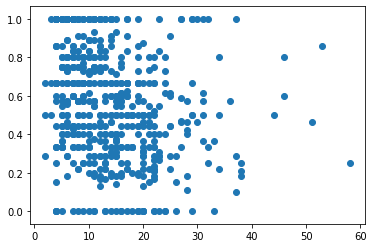

In [134]:
plt.scatter(df['TaskWC'], df['Rouge-1'])

In [135]:
df.describe()

,SumWC,TaskWC,ContextWC,DecWC,Rouge-1,Rouge-2,Rouge-L
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,5.496454,14.053191,27.939716,3.537234,0.551547,0.329247,0.551395
std,2.905557,8.366431,26.347384,1.504415,0.281662,0.350228,0.284679
min,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,1.000000,2.000000,0.333333,0.000000,0.333333
50%,5.000000,12.000000,20.000000,3.000000,0.563492,0.250000,0.545455
75%,7.000000,19.000000,55.000000,4.000000,0.750000,0.508333,0.800000
max,17.000000,58.000000,75.000000,11.000000,1.000000,1.000000,1.000000


Univariate distribution of rouge 1 scores:

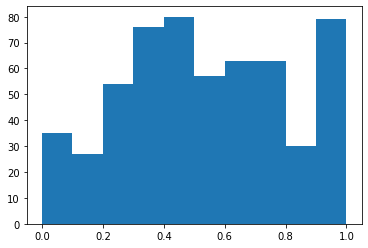

In [149]:
plt.hist(df['Rouge-1']); plt.show()

Analyzing perfect predictions:


In [136]:
(df['Rouge-1'] > 0.95).sum()

72

In [137]:
df[df['Rouge-1'] > 0.95].shape

(72, 11)

In [144]:
df[df['Rouge-1'] > 0.95][['Context', 'TaskSentence', 'ref', 'decoded']].sample(10)

,Context,TaskSentence,ref,decoded
537,nan,Please confirm the dates; November is already past.,confirm dates,confirm dates
497,"Tana -- Here it is, finally.",Could you send me the document and I'll get the proper signatures.,send document to SENDER,send document to SENDER
380,"3454-693. Hi Stephanie, I will get the final version of ECT - Goldman International agreement by the end of the day onThursday and there is a lot of pressure to get it executed right away. Tomorrow can you prepare and execute the accompanying documents. For ECT's Authorized Traders List, you need to add Mark Schlueter doublecheck spelling and phone number to the list of traders. This is a HIGH priority.",Please also revise the the trader list for both the ENA add Peter Schluter and ECT add Mark in order to execute the Deutsche Bank agreements we discussed today.,revise trader list,revise trader list
514,Carlos Hernandez has resigned his position with Enron.,Please remove him from all your mail lists.,remove Carlos Hernandez from mail lists,remove Carlos Hernandez from mail lists
24,"??? ??? ?? 713-2472-545 ? ? Parking Instructions ? At the corner of Walker and Bagby merge to the extreme left lane on Walker and enter the Theater District Parking ramp. At the base of the ramp turn left sharp and park under the covered deck. Enter City Hall through the double doors, go down the escalator and walk straight through the tunnel. At the 3 elevators enter and choose 3rd floor.",Please check in with receptionist upon arrival.,check in with receptionist,check in with receptionist
418,Louisiana North to IH 10 West on ramp. Allen Parkway to Studemont or Waugh to IH 10. West Gray to Montrose North Studemont to IH 10. Bagby W. Dallas to Montrose North Studemont to IH 10. San Jacinto to IH 10 East. North on main to IH 45. Travis to IH 45. The Downtown District is updating it's web site with detailed road closure maps and suggested alternate routes. This information is available at http://www.downtownstreets.com.,Please check this site regularly for updates on street closures.,check site for updates,check site for updates
203,"1 Would a gas compression service deal be required to be filed by the FERC? My sence is that the answer is no. This is simply an O&M service contract and lease agreement. 2 If a Pipeline is on an annual gas tracker, what would be the tracker implication? It should be flat, as technically, ECS has not changed the amount of fuel collected/utilized..we have only provided optionality as to hedgeing?? ?",Please give me a call to discuss.,call SENDER,call SENDER
106,nan,"Thanks , could you call Richard to talk though approach and strategy and then ensure that he is also kept fully in the loop as you go forward .",call Richard,call Richard
325,"Julianne,","Please address Cooper's questions, or forward to the Calgary office.",address Cooper 's questions,address Cooper 's questions
60,"I have underlined the additional language in the attached revised discount letter language will not be underlined when provided to Phillips . The inclusion of this language would require Transwestern to file the discount as a negotiated rate prior to gas flow under the term of the amendment. Transwestern would file this discount on January 31, 2001.",Please review the attached document and indicate approval via REPLY WITH HISTORY.,review document,review document


Many of the perfect summaries have fewer words, and involve 'Call'

## Most of the perfect summaries are 'call SENDER' summaries

Get subset of non Call messages

In [145]:
df2 = df[~(df['ref'].map(lambda x: 'call' in x))]

In [147]:
df2.shape

(494, 11)

In [150]:
df2.describe()

,SumWC,TaskWC,ContextWC,DecWC,Rouge-1,Rouge-2,Rouge-L
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,5.641700,14.287449,27.526316,3.668016,0.528782,0.292980,0.528348
std,2.900507,8.466517,26.588867,1.489350,0.274639,0.327682,0.278230
min,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,1.000000,3.000000,0.333333,0.000000,0.333333
50%,5.000000,13.000000,19.000000,4.000000,0.500000,0.222222,0.500000
75%,7.000000,19.000000,54.750000,4.000000,0.750000,0.500000,0.750000
max,17.000000,58.000000,75.000000,11.000000,1.000000,1.000000,1.000000


When erasing summaries involving call, rouge-1 only slips 3 points, from 55 to 52

In [151]:
df2.corr()

,SumWC,TaskWC,ContextWC,DecWC,Rouge-1,Rouge-2,Rouge-L
SumWC,1.000000,0.337489,0.058604,0.241931,-0.258433,-0.156367,-0.257938
TaskWC,0.337489,1.000000,0.230229,0.138042,-0.243734,-0.171736,-0.242506
ContextWC,0.058604,0.230229,1.000000,-0.054535,-0.085363,-0.040303,-0.083945
DecWC,0.241931,0.138042,-0.054535,1.000000,0.135176,0.153260,0.146936
Rouge-1,-0.258433,-0.243734,-0.085363,0.135176,1.000000,0.831250,0.987686
Rouge-2,-0.156367,-0.171736,-0.040303,0.153260,0.831250,1.000000,0.836947
Rouge-L,-0.257938,-0.242506,-0.083945,0.146936,0.987686,0.836947,1.000000


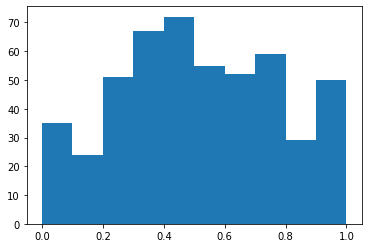

In [152]:
plt.hist(df2['Rouge-1']); plt.show()

In [153]:
df2[['Context', 'TaskSentence', 'ref', 'decoded']].sample(20)

,Context,TaskSentence,ref,decoded
24,"??? ??? ?? 713-2472-545 ? ? Parking Instructions ? At the corner of Walker and Bagby merge to the extreme left lane on Walker and enter the Theater District Parking ramp. At the base of the ramp turn left sharp and park under the covered deck. Enter City Hall through the double doors, go down the escalator and walk straight through the tunnel. At the 3 elevators enter and choose 3rd floor.",Please check in with receptionist upon arrival.,check in with receptionist,check in with receptionist
539,nan,Please take the variances through 0009 to the desk.,take variances to desk,take the variances through to desk
91,We need this agreement to be month-to-month. There is a possibility that HPL may be off this tower in a few months.,"Please get with Nathan Hlavaty with any questions, because I will be out of the office until May 30.",ask nastan Hlavaty questions,get Nathan Hlavaty with questions
31,"I'm remotely accessing this while travelling and have been unable to open the videos. This is likely a function of the remote connection. Ken and Jeff, I'll review each of yours when I'm better able to access. I'll then provide you my comments if any , as you will need to sign off on the release and use of these by Harvard.","Louise, will you please review at least your portion?",review your portion,review at portion
82,"Debra -. Attached is a worksheet for another new Master Firm Purchase/Sale, this time for Tucson Electric Power Company. Please prepare a draft and send to:. Mr. Dave Hutchens Tucson Electric Power Company One South Church Street Tucson, AZ 85701",Please also send a copy of draft to Kim Ward EB3204A and one to me EB2860 .,send a copy of draft to Kim Ward at eb3204a and SENDER at eb2860,send copy of draft to SENDER
179,nan,Please add to my personal contact list,add to SENDER 's personal contact list,add to personal contact list
443,"If anything, life sucks worse. There is a guy retiring today and I'm basically supposed to replace him on this project, but I've been so busy with other projects that I haven't had any time to pick his brain. So I am fucked but large.",Send the package to the office.,send package to the office,send package to office
130,"Kim, please forward to the traders. I think the schedulers have this already.",Please forward: Room Change,forward room change,forward room change change
448,"Mark, Paul would like to start his roadshow with Australian customers next Tuesday Monday afternoon, our time .","Could you please review the amendments which David Minns has recommended for the PA and ETA today, so that Paul can take a copy of at least the PA with him when he visits the customers?",review amendments,review amendments which David Minns
75,ALL. Attached is the initial draft of the Strategic Energy TF Report. This report is for your review and comment at the meeting on 10 Jan 01. The meeting is scheduled from 6:00 pm to 9:00 pm in NYC and 5:00 pm to 8:00 pm in Houston. We expect 32 participants.,Please provide comments to the project director Amy Jaffe or the task force chair Ed Morse.,provide comments to Amy Jaffe or Ed Morse,provide comments to Amy Jaffe


Notes:
* maybe the model needs access to vocabulary like 'ensure' and 'turn this'
* SENDER is occasionally used incorrectly, Send this to SENDER -- instead of email
* perhaps we could use some corrective rules, "on SENDER" -> on SENDER's calendar
    * check that SENDER
* we need to have special handling of ASAP

    
    
In some cases the model produces a better summary than the human in terms of conciseness, indicating there are enough concise summaries for it to do well. Example.

Task: 'Rhonda: I'm pretty certain that the matrix already designates the WSPP for this CP but if it does not, please revise the matrix'

Human Summary: 'revise matrix if it does n't designate the wspp for this cp	'

Predicted Summary: 'revise matrix'

In [1]:
df2[df2['Rouge-1'] < 0.3][['Context', 'TaskSentence', 'ref', 'decoded']].sample(30)

NameError: name 'df2' is not defined

Notes on bad predicions:
* Occasionally the task sentence is nonsense and should be replaced. eg. "-Origin: Taylor-M X-FileName: mtaylor.nsf"
* In general however, they are not bad

In [158]:
df[df['Rouge-1'] < 0.1][['Context', 'TaskSentence', 'ref', 'decoded']]

,Context,TaskSentence,ref,decoded
8,", photo gifts and all the other great services on Kodak PhotoNet online, so have fun trying new ways to use photos! For reference the access code for the roll that has been shared is: MY00MOOR981601. After logging into your account, all of your online rolls will appear. YouOll have 4 fun areas to choose from including:","VIEW AND SHARE: View your photos in thumbnail size or larger views, share a roll, email select pictures, download photos, send a photo photo postcard, or add a caption.",view photos,send email photo
12,"Thanks -Jackie- 3-9497. I extended the deal at mtr 6719 to include 2/10. In the future, please run all wellhead deals through Tom Acton first. I've got a message into Julie Meyers to look into the contract at meter 9676, and will let you know what she determines. D. Hi Daren, Can you please check into whether or not the below deals for the above meters can be rolled and extended?","If so, can you please perform this for me so that Anita can set up an accounting arrangement for me?",check if deals can be rolled or extended,perform this for SENDER
21,"The meeting is scheduled from 10 AM to 3 PM. As a prudent response to the tragic events of Sept 11th, PG&E has increased security measures at its 77 Beale/245 Market complex. These measures necessitate the following for attendance to the Oct 9th, San Francisco Planning Group meeting: Please RSVP by no later than close of business, Wednesday, Oct 3rd to Dalisay Ledy Torres at email preferred address DST2@pge.com or 415-9731-392 .","In your email response, please state you will be attending the Oct 9th San Francisco Planning Group meeting and who you will be representing.",rsvp Oct 9th San Francisco Planning Group meeting,email response
22,In situations where ENA has sold protection and .Com has bought protection on the same name this internal structure will permit ENA immediately Delivering on the Portfolio of Deliverable Obligations it as received as the Seller of protection to .Com which can in turn can Deliver on to the counterparty it has bought protection from. As a result all hedged trandsactions should have matched terms regardless of the Enron booking entity.,"Mark, Paul can you add further clarification as to the position particularly where I haven't hit the mark !",clarify the position,add clarification
38,"As of this moment, 68 percent of divers taking the survey are not changing existing travel plans. Of the 32 percent who are changing their plans, about 90 percent are only changing the dates or the destination of their travel. That means only 10 percent of divers taking the survey are permanently canceling their trips.","Please do your best to support the airline, hospitality, and resort sectors of the world economy and book a dive trip soon.",book a dive trip,do survey
52,"*~*~*~*~*~*~*~*~*~*~*~*~* Daily Riddle ~*~*~*~*~*~*~*~*~*~*~*~*~*. Today's Riddle is -. #1. Forward I am heavy, backward I am not. What am I? #2. What occurs once in every minute, twice in every moment, yet never in a thousand years? As always, you will find the answer below today's sponsor.",Please take a moment and visit today's sponsor-,visit sponsor,take answer 's today
53,"While I understand this is short notice, in case you are in New York on that date and also available for dinner, we will be delighted if you could join us. Rajat, Dean Jacobs, and a number of other Board members and supporters will also be there.",Please block off the date on your calendar and let me know if it is possible for you to attend.,check you can go to dinner,block off calendar
67,I just did a request to get Angela Davis in the Houston Office and Linda Sietzema and Sharon Crawford in the Calgary offices edit access to the Financial Trading Agreement Database. I also requested that Marcus Nettelton get edit access to the ENA Legal Online Trading Database.,I'm not sure if I did the erequest all ok. Can you check to make sure your got all four?,ensure you received all 

## Calculating Baseline Summary Scores 

use the task sentences themselves as summaries and check the scores

In [161]:
Rouge().get_scores(df['TaskSentence'], df['ref'], avg = True)

{'rouge-1': {'f': 0.3810508422187367,
  'p': 0.297803599452422,
  'r': 0.6383575911931673},
 'rouge-2': {'f': 0.19306868112126727,
  'p': 0.1507953749930362,
  'r': 0.321844083812169},
 'rouge-l': {'f': 0.37933693381558636,
  'p': 0.29755975056577855,
  'r': 0.6234437315280559}}

This serves as evidence that our summarization is better than a naive baseline of coping the task sentence

In [23]:
import spacy
import neuralcoref

AttributeError: type object 'neuralcoref.neuralcoref.array' has no attribute '__reduce_cython__'

In [ ]:
nlp = spacy.load('en')
neuralcoref.add_to_pipe(nlp)
doc1 = nlp('My sister has a dog. She loves him.')
print(doc1._.coref_clusters)

doc2 = nlp('Angela lives in Boston. She is quite happy in that city.')
for ent in doc2.ents:
    print(ent._.coref_cluster)